# Shallow Neural Network in TensorFlow

Build a shallow neural network to classify handwritten digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_tensorflow.ipynb)

#### Load dependencies

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

#### Load data

In [30]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [31]:
X_train.shape

(60000, 28, 28)

In [32]:
y_train.shape

(60000,)

In [33]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

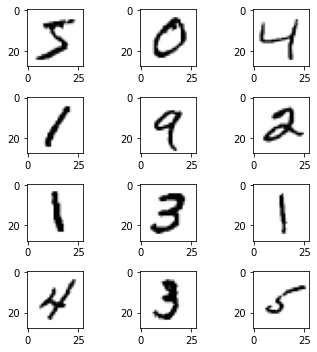

In [34]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(4, 3, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('on')
plt.tight_layout()
plt.show()

In [35]:
X_valid.shape

(10000, 28, 28)

In [36]:
y_valid.shape

(10000,)

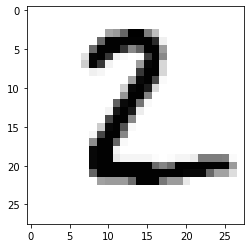

In [37]:
plt.imshow(X_valid[1], cmap='Greys')

In [38]:
X_valid[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [39]:
y_valid[1]

2

#### Preprocess data

In [40]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [41]:
X_train /= 255
X_valid /= 255

In [42]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [43]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [44]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [45]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [47]:
(64*784)

50176

In [48]:
(64*784)+64

50240

In [49]:
(10*64)+10

650

#### Configure model

In [50]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

#### Train!

In [24]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0931 - accuracy: 0.0845 - val_loss: 0.0917 - val_accuracy: 0.0947
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0915 - accuracy: 0.1015 - val_loss: 0.0908 - val_accuracy: 0.1104
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.1211 - val_loss: 0.0901 - val_accuracy: 0.1475
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.1595 - val_loss: 0.0897 - val_accuracy: 0.1990
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0896 - accuracy: 0.2060 - val_loss: 0.0892 - val_accuracy: 0.2353
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.2408 - val_loss: 0.0889 - val_accuracy: 0.2566
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0888 - accuracy: 0.2630 - val_loss: 0.0885 - val_accuracy: 0.2803

#### Evaluating model performance

In [25]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 0.8677


[0.02725209668278694, 0.8676999807357788]

#### Performing inference

In [26]:
valid_0 = X_valid[0].reshape(1, 784)

In [27]:
model.predict(valid_0)

array([[4.2893384e-03, 1.8505112e-03, 2.3022650e-03, 7.5446190e-03,
        4.8252135e-03, 7.7640968e-03, 3.3009681e-04, 9.2715919e-01,
        5.7379273e-03, 3.8196657e-02]], dtype=float32)

In [28]:
model.predict_classes(valid_0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])